In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

from luwiji.cluster import demo

In [12]:
import sklearn
sklearn.__version__

'1.0.2'

# Sample Data

In [4]:
X1, y1 = demo.blob_data()
X2, y2 = demo.moon_data()
X3, y3 = demo.circle_data()

# Visualize

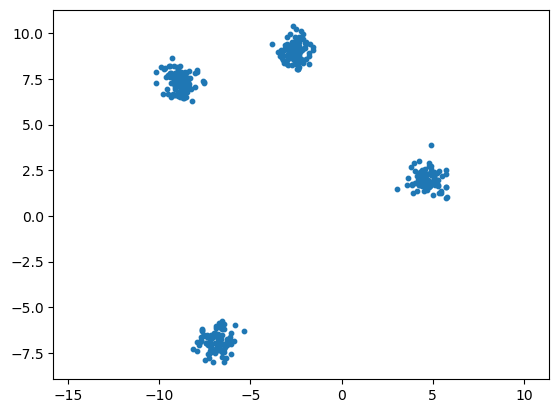

In [5]:
X = X1
plt.scatter(X[:,0], X[:, 1], s=10)
plt.axis("equal");

# K-Means Clustering

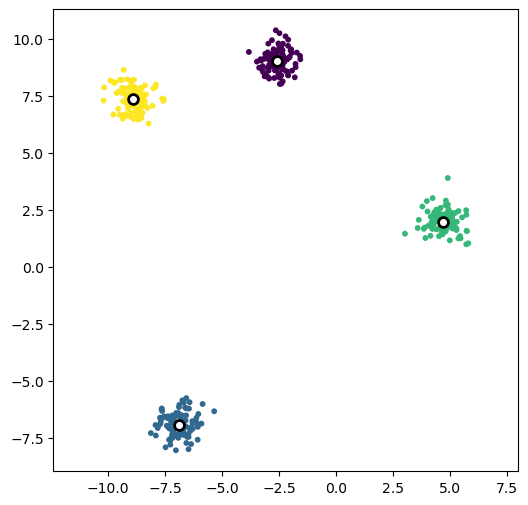

In [6]:
X = X1

kmeans = KMeans(n_clusters=4)
member = kmeans.fit_predict(X)
center = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:, 1], s=10, c=member)
plt.scatter(center[:, 0], center[:, 1], c="w", edgecolors="k", s=50, linewidths=2)
plt.axis("equal");

# K-Means weakness

- Kesulitan menentukan K
    - Solusi : Elbow Analysis, sillhoutte score, and others.
- Hanya untuk data yang bisa dirata-ratakan
    - Solusi : K-Medoid ` Menjadikan data sebagai centroid`, K-Modes `  Modus`
- Solusi tidak selalu optimal
- Hanya untuk data linearly-separable

# Cara menentukan K (n_cluster) tanpa label -> Inertia / Elbow Analysis

### Elbow analysis adalah plot inertia atau mencari sebuah siku yang menunjukan score tidak signifikan
- Pada contoh dibawah menunjukan siku berada pada cluster ke 4

Text(0, 0.5, 'Inertia')

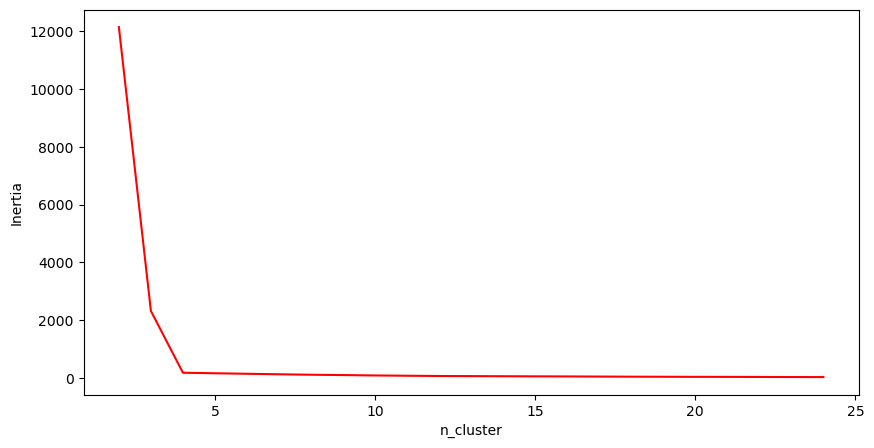

In [7]:
X = X1
score = []

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(X)
    
    score.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), score, "r-")
plt.xlabel("n_cluster")
plt.ylabel("Inertia")

# Cara menentukan K (n_cluster) ada Label -> Silhouette Score

In [8]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Inertia')

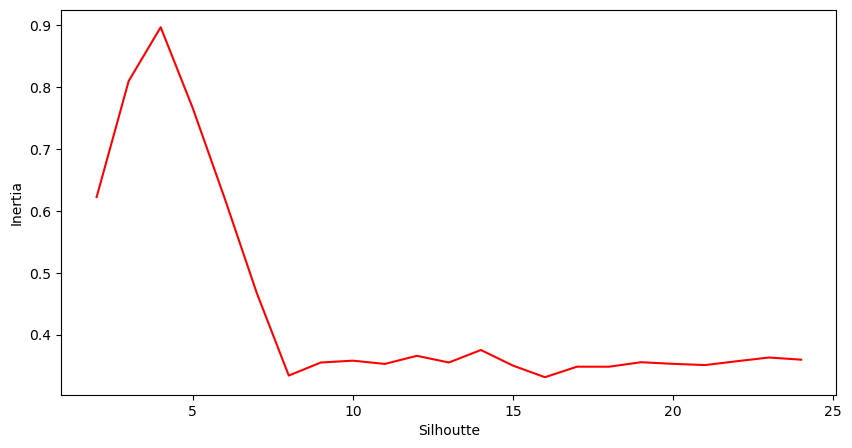

In [9]:
X = X1
score = []

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(X)
    
    siluet = silhouette_score(X, member, metric='euclidean')
    score.append(siluet)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), score, "r-")
plt.xlabel("Silhoutte")
plt.ylabel("Inertia")

# Beyond k-means

## Spectral Clustering

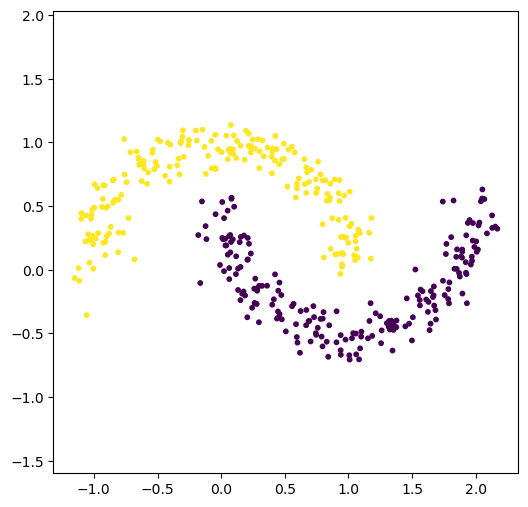

In [17]:
X = X2

sc = SpectralClustering(n_clusters=2, gamma=100)
member = sc.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=member, s=10)
plt.axis("equal");

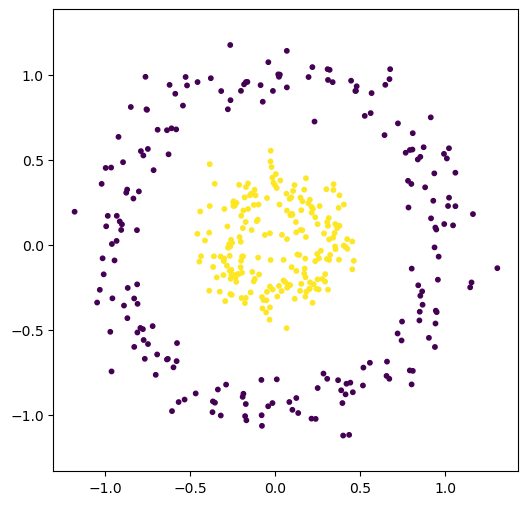

In [18]:
X = X3

sc = SpectralClustering(n_clusters=2, gamma=100)
member = sc.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=member, s=10)
plt.axis("equal");

# DBSCAN

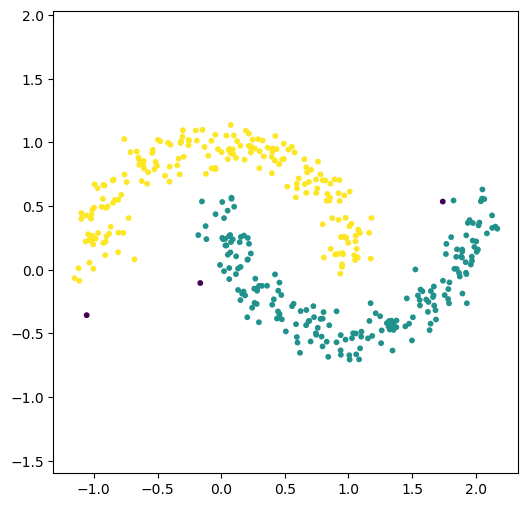

In [20]:
X = X2

sc = DBSCAN(eps=0.2)
member = sc.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=member, s=10)
plt.axis("equal");

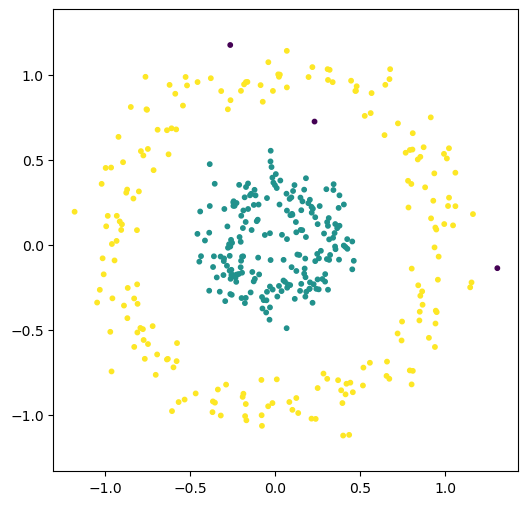

In [21]:
X = X3

sc = DBSCAN(eps=0.2)
member = sc.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=member, s=10)
plt.axis("equal");